In [5]:
#pip install torch --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#!pip3 install Cython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch [1/50], Loss: 0.2593
Epoch [2/50], Loss: 0.1615
Epoch [3/50], Loss: 0.1359
Epoch [4/50], Loss: 0.1239
Epoch [5/50], Loss: 0.1180
Epoch [6/50], Loss: 0.1135
Epoch [7/50], Loss: 0.1098
Epoch [8/50], Loss: 0.1073
Epoch [9/50], Loss: 0.1055
Epoch [10/50], Loss: 0.1041


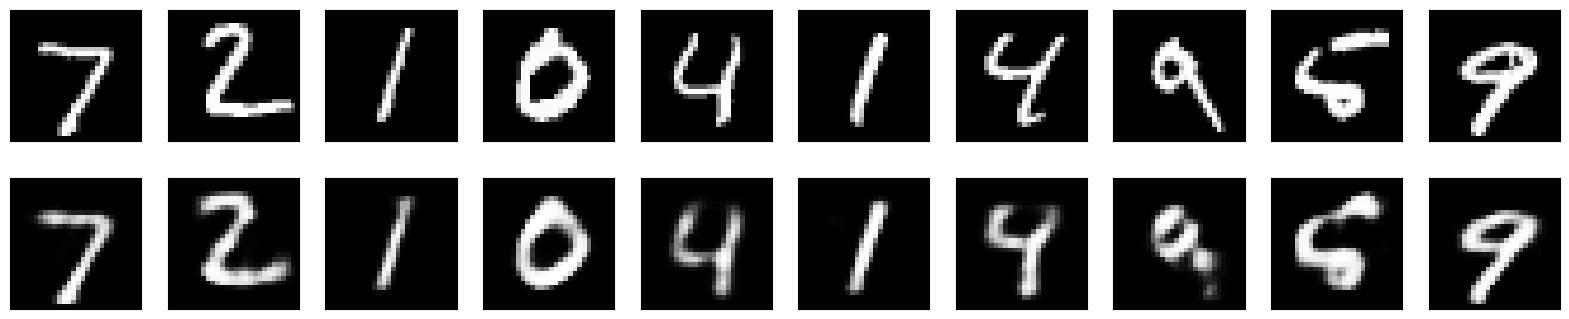

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, download=True, transform=ToTensor())
test_dataset = MNIST(root='./data', train=False, download=True, transform=ToTensor())

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# Define the autoencoder model
input_dim = 784
encoding_dim = 32

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the model
for epoch in range(10):
    running_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 50, epoch_loss))

# Encode and decode some images
dataiter = iter(test_loader)
images, _ = next(dataiter)
images = images.view(images.size(0), -1)
encoded_imgs = autoencoder.encoder(images)
decoded_imgs = autoencoder.decoder(encoded_imgs)

# Display the original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(np.reshape(images.data.numpy()[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.reshape(decoded_imgs.data.numpy()[i], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
